In [422]:
%matplotlib inline

In [423]:
from pyxs import Data2D,Mask
from pyxs.plot.Axes2DPlot import Axes2dplot
from pyxs.ext import RQconv
from pyxs.slnXS import mod_qgrid, Data1d, average, analyze, plot_Guinier
import numpy as np
import matplotlib as mpl
import pylab as plt
import re,os

In [3]:
import PIL
from PIL import Image
from IPython.display import display, clear_output

In [4]:
#getE()

11384.242419742694

In [5]:
ene = 11384.2
wl = 2.*np.pi*1973/ene

In [6]:
es = RQconv.ExpPara()
ew1 = RQconv.ExpPara()
ew2 = RQconv.ExpPara()
ms = Mask.Mask(1043, 981)
mw1 = Mask.Mask(619, 487)
mw2 = Mask.Mask(487, 619)

In [217]:
def get_data_from_fn(fn, exp_para):
    d2s = Data2D.Data2d(fn+"_SAXS.cbf")
    d2w1 = Data2D.Data2d(fn+"_WAXS1.cbf")
    d2w2 = Data2D.Data2d(fn+"_WAXS2.cbf")
    d2s.set_exp_para(exp_para[0])
    d2w1.set_exp_para(exp_para[1])
    d2w2.set_exp_para(exp_para[2])
    return (d2s, d2w1, d2w2)

In [252]:
fn = '/GPFS/xf16id/exp_path/301525/300890/AgBe_jan31_v1_000001'
d2s, d2w1, d2w2 = get_data_from_fn(fn, [es, ew1, ew2])

In [274]:
es.wavelength = wl
es.bm_ctr_x = 465.
es.bm_ctr_y = 718.
es.ratioDw = 20.8
es.det_orient = 0
es.det_tilt = 0
es.det_phi = 0
es.grazing_incident = False
es.flip = 1
es.incident_angle = 0.2
es.sample_normal = 0

<IPython.core.display.Javascript object>


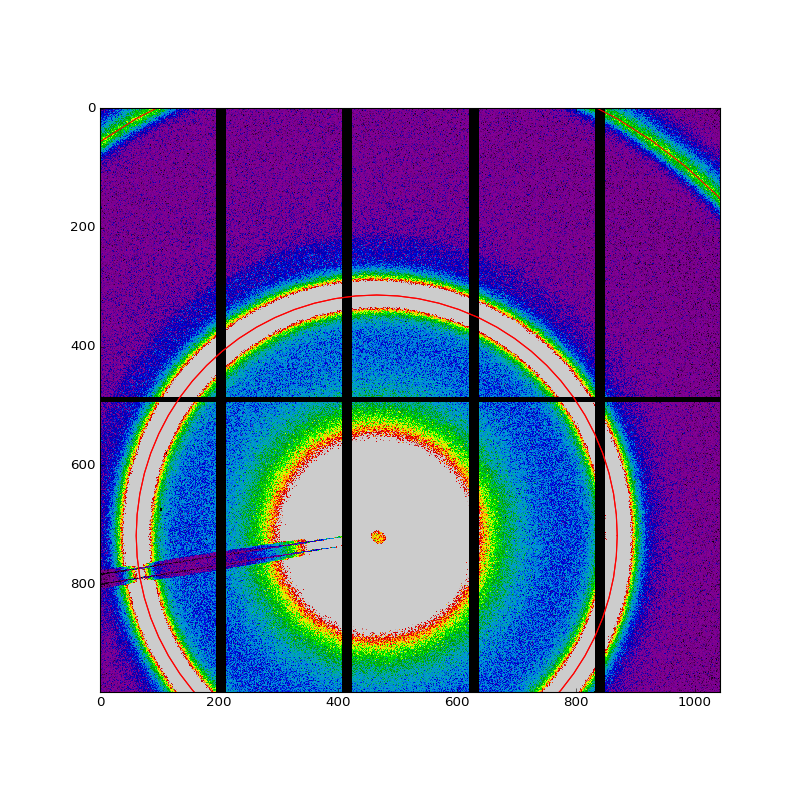

In [275]:
fig = plt.figure(figsize=(10, 10))
ax = plt.gca()
pax = Axes2dplot(ax, d2s)
pax.plot() #log=True) #, mask=ms)
pax.img.set_clim(0.01,100)
#pax.set_color_scale(mpl.cm.gist_yarg)
pax.add_dec("Q 0.1076 72 r-")
pax.add_dec("Q 0.2152 72 r-")

In [297]:
ew1.wavelength = wl
ew1.bm_ctr_x = -123     # 745
ew1.bm_ctr_y = 225   # 244.4
ew1.ratioDw = 2.72
ew1.det_orient = 0
ew1.det_tilt = -26
ew1.det_phi = 0
ew1.grazing_incident = False
ew1.flip = 1
ew1.incident_angle = 0.2
ew1.sample_normal = 0

<IPython.core.display.Javascript object>


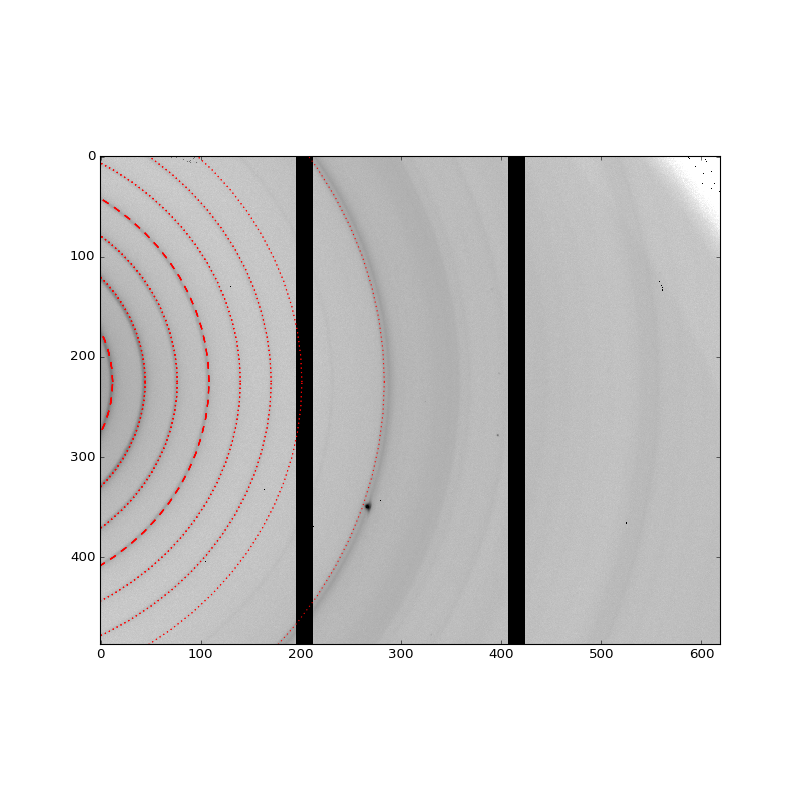

In [320]:
fig = plt.figure(figsize=(10, 10))
ax = plt.gca()
pax = Axes2dplot(ax, d2w1)
pax.plot(log=True) #, mask=mw1)
pax.img.set_clim(10,2e5)
pax.set_color_scale(mpl.cm.gist_yarg)
pax.add_dec("Q 0.1076 72 r-")
pax.add_dec("Q 0.2152 72 r-")
pax.add_dec("Q 0.3228 72 r-")
pax.add_dec("Q 0.4304 72 r--")
pax.add_dec("Q 0.5380 72 r:")
pax.add_dec("Q 0.6456 72 r:")
pax.add_dec("Q 0.7532 72 r--")
pax.add_dec("Q 0.8608 72 r:")
pax.add_dec("Q 0.9684 72 r:")
pax.add_dec("Q 1.0760 72 r:")
pax.add_dec("Q 1.37 72 r:")

In [315]:
ew2.wavelength = wl
ew2.bm_ctr_x = 642     # 648
ew2.bm_ctr_y = 281.   # 537.8
ew2.ratioDw = 3.84
ew2.det_orient = 0.
ew2.det_tilt = 24.
ew2.det_phi = 0.
ew2.grazing_incident = False
ew2.flip = 0
ew2.incident_angle = 0.2
ew2.sample_normal = 0

<IPython.core.display.Javascript object>


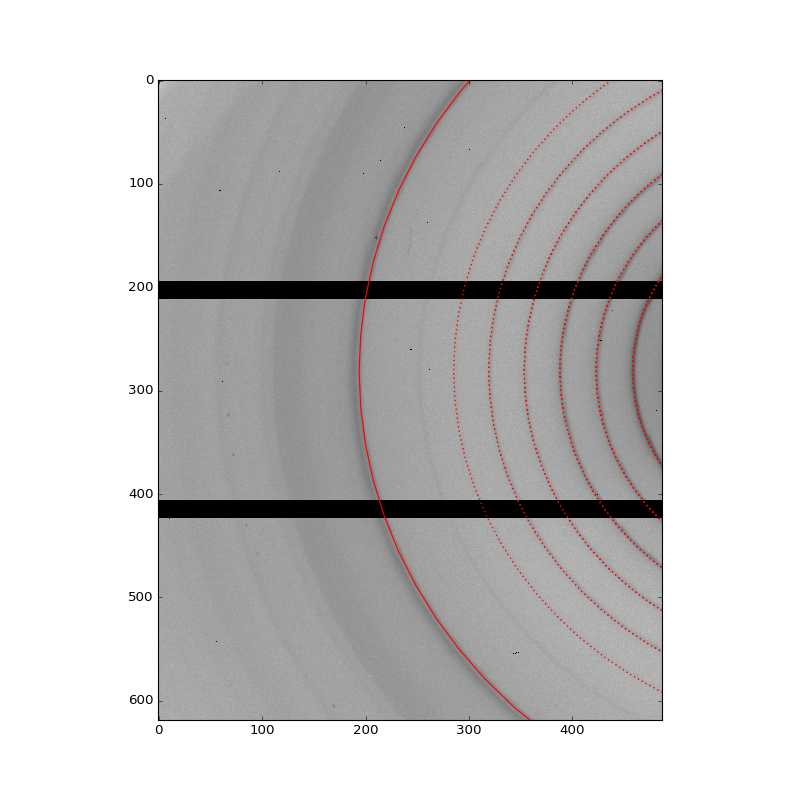

In [319]:
fig = plt.figure(figsize=(10, 10))
ax = plt.gca()
pax = Axes2dplot(ax, d2w2)
pax.plot(log=True) #, mask=mw2)
pax.img.set_clim(0.5e1,2e4)
pax.set_color_scale(mpl.cm.gist_yarg)
pax.add_dec("Q 0.1076 72 r-")
pax.add_dec("Q 0.2152 72 r-")
pax.add_dec("Q 0.3228 72 r-")
pax.add_dec("Q 0.4304 72 r--")
pax.add_dec("Q 0.5380 72 r:")
pax.add_dec("Q 0.6456 72 r:")
pax.add_dec("Q 0.7532 72 r:")
pax.add_dec("Q 0.8608 72 r:")
pax.add_dec("Q 0.9684 72 r:")
pax.add_dec("Q 1.0760 72 r:")
pax.add_dec("Q 1.37 72 r-")

In [10]:
class thumb_config:
    def __init__(self):
        self.center_S = (es.bm_ctr_x, es.bm_ctr_y)
        self.scale_S = 200./128
        self.cmin_S = 0.5
        self.cmax_S = 10000
        self.logscale_S = True
        # WAXS1
        self.center_W1 = (310, 240)
        self.scale_W1 = 240./128
        self.cmin_W1 = 2
        self.cmax_W1 = 500    
        self.logscale_S = False
        # WAXS2
        self.center_W2 = (240, 310)
        self.scale_W2 = 240./128
        self.cmin_W2 = 1
        self.cmax_W2 = 500  
        self.logscale_S = True

In [11]:
def get_thumb_data_fn(fn, exp_para, center, size=(32,32), scale=10, cmin=0.5, cmax=100., logscale=True):
    d2 = Data2D.Data2d(fn)
    d2.set_exp_para(exp_para)

    fig = plt.figure()
    ax = plt.axes([0., 0., 1., 1.], frameon=False, xticks=[],yticks=[])
    pax = Axes2dplot(ax, d2)
    pax.plot(log=logscale)
    pax.img.set_clim(cmin,cmax)
    # mpl.cm.inferno, mpl.cm.gist_ncar, mpl.cm.gist_stern
    pax.set_color_scale(mpl.cm.gist_ncar)
    ax.set_xlim(center[0]-size[0]*scale, center[0]+size[0]*scale)
    # origin is at the top left corner of the image
    ax.set_ylim(center[1]+size[1]*scale, center[1]-size[1]*scale)
    
    canvas = plt.get_current_fig_manager().canvas 
    canvas.draw() 
    pil_image = PIL.Image.frombytes('RGB', canvas.get_width_height(), canvas.tostring_rgb())
    bbox = np.asarray(ax.bbox.get_points().flatten(), dtype=np.int)
    thumb = pil_image.crop(bbox)
    thumb.thumbnail(size, Image.ANTIALIAS)
    
    del ax,pax,d2,pil_image
    fig.clf()
    plt.close()
    return thumb

def get_thumb_data(im, exp_para, center, size=(32,32), scale=10, cmin=0.5, cmax=100., logscale=True):
    d2 = Data2D.Data2d("",im=im)
    d2.set_exp_para(exp_para)

    fig = plt.figure()
    ax = plt.axes([0., 0., 1., 1.], frameon=False, xticks=[],yticks=[])
    pax = Axes2dplot(ax, d2)
    pax.plot(log=logscale)
    pax.img.set_clim(cmin,cmax)
    # mpl.cm.inferno, mpl.cm.gist_ncar, mpl.cm.gist_stern
    pax.set_color_scale(mpl.cm.gist_ncar)
    ax.set_xlim(center[0]-size[0]*scale, center[0]+size[0]*scale)
    # origin is at the top left corner of the image
    ax.set_ylim(center[1]+size[1]*scale, center[1]-size[1]*scale)
    
    canvas = plt.get_current_fig_manager().canvas 
    canvas.draw() 
    pil_image = PIL.Image.frombytes('RGB', canvas.get_width_height(), canvas.tostring_rgb())
    bbox = np.asarray(ax.bbox.get_points().flatten(), dtype=np.int)
    thumb = pil_image.crop(bbox)
    thumb.thumbnail(size, Image.ANTIALIAS)
    
    del ax,pax,d2,pil_image
    fig.clf()
    plt.close()
    return thumb

In [138]:
def get_fn_from_mesh(uid, row, col, fast_axis = None):
    header = db(uid=uid)

    if fast_axis=='x' or fast_axis=='y':
        f_axis = fast_axis
    else:
        if header[0].start.plan_name == 'mesh':
            scan_extents = header[0].start.extents
            scan_shape =  header[0].start.shape
            # this works for ss2_x, ss1_x, smf_x
            if re.search('s[\w]*_x', header[0].start.plan_pattern_args['args'][-5]):
            #if 'ss2_x' in header[0].start.plan_pattern_args['args'][-5]:
                f_axis = 'x'
            else:
                f_axis = 'y'
        else:
            print("invalid plan_name: %s, this works only for mesh" % header.plan_name)
            return
    
    print("fast axis is "+f_axis)
    print("scan shape: ", scan_shape)

    if f_axis=='x':
        if row>scan_shape[0] or col>scan_shape[1]:
            print("row/col number out of bounds.")
            return -1
        sn = (row-1)*scan_shape[1] + col-1
    else:
        if row>scan_shape[1] or col>scan_shape[0]:
            print("row/col number out of bounds.")
            return -1
        sn = (col-1)*scan_shape[1] + row-1
    
    return sn+1

In [ ]:
# this version only process Ntot images, after skipping the first N_skip images
def save_thumb2(uid, image_fn, config, fast_axis = None, Ntot=-1, N_skip=0, size = (64,64)):
    header = db(uid=uid)

    if fast_axis=='x' or fast_axis=='y':
        f_axis = fast_axis

    if header[0].start.plan_name == 'mesh':
        scan_extents = header[0].start.extents
        scan_shape =  header[0].start.shape
        if fast_axis=='x' or fast_axis=='y':
            f_axis = fast_axis
        else:
            if re.search('s[\w]*_x', header[0].start.plan_pattern_args['args'][-5]):
            #if 'ss2_x' in header[0].start.plan_pattern_args['args'][-5]:
                f_axis = 'x'
            else:
                f_axis = 'y'
    elif header[0].start.plan_name == 'd2scan':
        scan_shape =  [1, header[0].start.num_steps]
        if fast_axis=='x' or fast_axis=='y':
            f_axis = fast_axis
        else:
            if re.search('s[\w]*_x', header[0].start.motors[0]):
            #if 'ss2_x' in header[0].start.motors[0]:
                f_axis = 'x'
            else:
                f_axis = 'y'
    else:
        print("invalid plan_name: %s" % header.plan_name)
        return
    
    print("fast axis is "+f_axis)
    print("scan shape: ", scan_shape)
    
    # determine the actual size for processing, make sure N_skip and Ntot start
    #  from the beginning of the fast axis
    
    N_skip = N_skip - N_skip%scan_shape[1]
    frame_no = N_skip
    s_start = int(N_skip/scan_shape[1])
    
    if Ntot<0:
        s_end = scan_shape[0]
    else:
        s_end = int((Ntot - Ntot%scan_shape[1])/scan_shape[1]) + s_start
        if s_end>scan_shape[0]:
            s_end = scan_shape[0]
    # this is the actual length of the slow axis
    scan_shape[0] = s_end - s_start
    if scan_shape[0]==0:
        scan_shape[0]=1
    
    if f_axis=='x':
        mosaic_size = (size[0]*scan_shape[1], size[1]*scan_shape[0])
    else:
        mosaic_size = (size[0]*scan_shape[0], size[1]*scan_shape[1])
    
    blank_SAXS = Image.new("RGB", mosaic_size, "white")
    blank_WAXS1 = Image.new("RGB", mosaic_size, "white")
    blank_WAXS2 = Image.new("RGB", mosaic_size, "white")

    fn_path = db.get_table(header[0], fields=['pil1M_file_file_template', 'pil1M_file_file_name', 
                                              'pil1M_file_file_path', 'pil1M_file_file_number', 
                                              'pilW1_file_file_template', 'pilW1_file_file_name', 
                                              'pilW1_file_file_path', 'pilW1_file_file_number',
                                              'pilW2_file_file_template', 'pilW2_file_file_name', 
                                              'pilW2_file_file_path', 'pilW2_file_file_number'])
 
    for i in range(scan_shape[0]):
        for j in range(scan_shape[1]):
            frame_no += 1
            fn = fn_path.pil1M_file_file_template[frame_no] % (fn_path.pil1M_file_file_path[frame_no],
                                                               fn_path.pil1M_file_file_name[frame_no],
                                                               fn_path.pil1M_file_file_number[frame_no])
            thumb_S = get_thumb_data(fn, es, 
                                     config.center_S, size, config.scale_S, 
                                     config.cmin_S, config.cmax_S, config.logscale_S)
            fn = fn_path.pilW1_file_file_template[frame_no] % (fn_path.pilW1_file_file_path[frame_no],
                                                               fn_path.pilW1_file_file_name[frame_no],
                                                               fn_path.pilW1_file_file_number[frame_no])
            thumb_W1 = get_thumb_data(fn, ew1, 
                                      config.center_W1, size, config.scale_W1, 
                                      config.cmin_W1, config.cmax_W1, config.logscale_W1)
            fn = fn_path.pilW2_file_file_template[frame_no] % (fn_path.pilW2_file_file_path[frame_no],
                                                               fn_path.pilW2_file_file_name[frame_no],
                                                               fn_path.pilW2_file_file_number[frame_no])
            thumb_W2 = get_thumb_data(fn, ew2, 
                                      config.center_W2, size, config.scale_W2, 
                                      config.cmin_W2, config.cmax_W2, config.logscale_W2)
            if f_axis=='x':
                blank_SAXS.paste(thumb_S,(j*size[0], i*size[1]))
                blank_WAXS1.paste(thumb_W1,(j*size[0], i*size[1]))
                blank_WAXS2.paste(thumb_W2,(j*size[0], i*size[1]))
            else:
                blank_SAXS.paste(thumb_S,(i*size[0], j*size[1]))
                blank_WAXS1.paste(thumb_W1,(i*size[0], j*size[1]))
                blank_WAXS2.paste(thumb_W2,(i*size[0], j*size[1]))
            clear_output(wait=True)
            print("processing frame #%d (%d,%d)" % (frame_no,i,j))
            sys.stdout.flush()
            del thumb_S, thumb_W1, thumb_W2

    blank_SAXS.save(image_fn+"_SAXS.jpg")
    blank_WAXS1.save(image_fn+"_WAXS1.jpg")
    blank_WAXS2.save(image_fn+"_WAXS2.jpg")
    del header

In [142]:
# this version only process Ntot images, after skipping the first N_skip images
def save_thumb(uid, image_fn, config, fast_axis = None, Ntot=-1, N_skip=0, size = (64,64)):
    header = db(uid=uid)

    if fast_axis=='x' or fast_axis=='y':
        f_axis = fast_axis

    if header[0].start.plan_name == 'mesh':
        scan_extents = header[0].start.extents
        scan_shape =  header[0].start.shape
        if fast_axis=='x' or fast_axis=='y':
            f_axis = fast_axis
        else:
            if re.search('s[\w]*_x', header[0].start.plan_pattern_args['args'][-5]):
            #if 'ss2_x' in header[0].start.plan_pattern_args['args'][-5]:
                f_axis = 'x'
            else:
                f_axis = 'y'
    elif header[0].start.plan_name == 'd2scan':
        scan_shape =  [1, header[0].start.num_steps]
        if fast_axis=='x' or fast_axis=='y':
            f_axis = fast_axis
        else:
            if re.search('s[\w]*_x', header[0].start.motors[0]):
            #if 'ss2_x' in header[0].start.motors[0]:
                f_axis = 'x'
            else:
                f_axis = 'y'
    else:
        print("invalid plan_name: %s" % header.plan_name)
        return
    
    print("fast axis is "+f_axis)
    print("scan shape: ", scan_shape)
    
    # determine the actual size for processing, make sure N_skip and Ntot start
    #  from the beginning of the fast axis
    
    N_skip = N_skip - N_skip%scan_shape[1]
    frame_no = N_skip
    s_start = int(N_skip/scan_shape[1])
    
    if Ntot<0:
        s_end = scan_shape[0]
    else:
        s_end = int((Ntot - Ntot%scan_shape[1])/scan_shape[1]) + s_start
        if s_end>scan_shape[0]:
            s_end = scan_shape[0]
    # this is the actual length of the slow axis
    scan_shape[0] = s_end - s_start
    if scan_shape[0]==0:
        scan_shape[0]=1
    
    if f_axis=='x':
        mosaic_size = (size[0]*scan_shape[1], size[1]*scan_shape[0])
    else:
        mosaic_size = (size[0]*scan_shape[0], size[1]*scan_shape[1])
    
    blank_SAXS = Image.new("RGB", mosaic_size, "white")
    blank_WAXS1 = Image.new("RGB", mosaic_size, "white")
    blank_WAXS2 = Image.new("RGB", mosaic_size, "white")
    imS = db.get_images(header, 'pil1M_image')
    imW1 = db.get_images(header, 'pilW1_image')
    imW2 = db.get_images(header, 'pilW2_image')    

    for i in range(scan_shape[0]):
        for j in range(scan_shape[1]):
            thumb_S = get_thumb_data(imS[frame_no], es, 
                                     config.center_S, size, config.scale_S, 
                                     config.cmin_S, config.cmax_S, config.logscale_S)
            thumb_W1 = get_thumb_data(imW1[frame_no], ew1, 
                                      config.center_W1, size, config.scale_W1, 
                                      config.cmin_W1, config.cmax_W1, config.logscale_W1)
            thumb_W2 = get_thumb_data(imW2[frame_no], ew2, 
                                      config.center_W2, size, config.scale_W2, 
                                      config.cmin_W2, config.cmax_W2, config.logscale_W2)
            if f_axis=='x':
                blank_SAXS.paste(thumb_S,(j*size[0], i*size[1]))
                blank_WAXS1.paste(thumb_W1,(j*size[0], i*size[1]))
                blank_WAXS2.paste(thumb_W2,(j*size[0], i*size[1]))
            else:
                blank_SAXS.paste(thumb_S,(i*size[0], j*size[1]))
                blank_WAXS1.paste(thumb_W1,(i*size[0], j*size[1]))
                blank_WAXS2.paste(thumb_W2,(i*size[0], j*size[1]))
            clear_output(wait=True)
            print("processing frame #%d (%d,%d)" % (frame_no,i,j))
            sys.stdout.flush()
            del thumb_S, thumb_W1, thumb_W2
            frame_no += 1

    blank_SAXS.save(image_fn+"_SAXS.jpg")
    blank_WAXS1.save(image_fn+"_WAXS1.jpg")
    blank_WAXS2.save(image_fn+"_WAXS2.jpg")
    del header, imS, imW1, imW2

In [14]:
def get_data_from_fns(fn, exp_para):
    d2s = Data2D.Data2d(fn+"_SAXS.cbf")
    d2w1 = Data2D.Data2d(fn+"_WAXS1.cbf")
    d2w2 = Data2D.Data2d(fn+"_WAXS2.cbf")
    d2s.set_exp_para(exp_para[0])
    d2w1.set_exp_para(exp_para[1])
    d2w2.set_exp_para(exp_para[2])
    return (d2s, d2w1, d2w2)

In [15]:
tc = thumb_config()

In [ ]:
def test_plot(uid, sn, tc):
    header = db(uid=uid)

    fn_path = db.get_table(header[0], fields=['pil1M_file_file_template', 'pil1M_file_file_name', 
                                              'pil1M_file_file_path', 'pil1M_file_file_number'])
    fn = fn_path.pil1M_file_file_template[sn] % (fn_path.pil1M_file_file_path[sn],
                                                 fn_path.pil1M_file_file_name[sn],
                                                 fn_path.pil1M_file_file_number[sn])
    print(fn)
    d2s = Data2D.Data2d(fn)
    d2s.set_exp_para(es)
    
    fn_path = db.get_table(header[0], fields=['pilW1_file_file_template', 'pilW1_file_file_name', 
                                              'pilW1_file_file_path', 'pilW1_file_file_number'])
    fn = fn_path.pilW1_file_file_template[sn] % (fn_path.pilW1_file_file_path[sn],
                                                 fn_path.pilW1_file_file_name[sn],
                                                 fn_path.pilW1_file_file_number[sn])
    print(fn)
    d2w1 = Data2D.Data2d(fn)
    d2w1.set_exp_para(ew1)

    fn_path = db.get_table(header[0], fields=['pilW2_file_file_template', 'pilW2_file_file_name', 
                                              'pilW2_file_file_path', 'pilW2_file_file_number'])
    fn = fn_path.pilW2_file_file_template[sn] % (fn_path.pilW2_file_file_path[sn],
                                                 fn_path.pilW2_file_file_name[sn],
                                                 fn_path.pilW2_file_file_number[sn])
    print(fn)
    d2w2 = Data2D.Data2d(fn)
    d2w2.set_exp_para(ew2)

    plt.figure(figsize=(12, 4))
    ax = plt.subplot(131)
    pax = Axes2dplot(ax, d2s)
    pax.plot(log=tc.logscale_S) 
    pax.img.set_clim(tc.cmin_S, tc.cmax_S)
    #pax.set_color_scale(mpl.cm.inferno) 
    pax.set_color_scale(mpl.cm.gist_ncar)
    ax.set_xlim(tc.center_S[0]-size[0]*tc.scale_S, tc.center_S[0]+size[0]*tc.scale_S)
    ax.set_ylim(tc.center_S[1]+size[1]*tc.scale_S, tc.center_S[1]-size[1]*tc.scale_S)

    ax = plt.subplot(132)
    pax = Axes2dplot(ax, d2w1)
    pax.plot(log=tc.logscale_W1) 
    pax.img.set_clim(tc.cmin_W1, tc.cmax_W1)
    #pax.set_color_scale(mpl.cm.inferno) 
    pax.set_color_scale(mpl.cm.gist_ncar)
    ax.set_xlim(tc.center_W1[0]-size[0]*tc.scale_W1, tc.center_W1[0]+size[0]*tc.scale_W1)
    ax.set_ylim(tc.center_W1[1]+size[1]*tc.scale_W1, tc.center_W1[1]-size[1]*tc.scale_W1)

    ax = plt.subplot(133)
    pax = Axes2dplot(ax, d2w2)
    pax.plot(log=tc.logscale_W2) 
    pax.img.set_clim(tc.cmin_W2, tc.cmax_W2)
    #pax.set_color_scale(mpl.cm.inferno) 
    pax.set_color_scale(mpl.cm.gist_ncar)
    ax.set_xlim(tc.center_W2[0]-size[0]*tc.scale_W2, tc.center_W2[0]+size[0]*tc.scale_W2)
    ax.set_ylim(tc.center_W2[1]+size[1]*tc.scale_W2, tc.center_W2[1]-size[1]*tc.scale_W2)

    plt.show()

In [18]:
TB_sample1_gz = 'f21ca8fb-f0fc-41c8-ae43-a86e55b10217'

In [25]:
size = [128, 128]

tc.center_S = (480, 700)
tc.scale_S = 280./128
tc.cmin_S = 0.5
tc.cmax_S = 50000
tc.logscale_S = True
# WAXS1
tc.center_W1 = (310, 240)
tc.scale_W1 = 240./128
tc.cmin_W1 = 1
tc.cmax_W1 = 150
tc.logscale_W1 = False
# WAXS2
tc.center_W2 = (240, 310)
tc.scale_W2 = 240./128
tc.cmin_W2 = 1
tc.cmax_W2 = 200
tc.logscale_W2 = True

EpicsMotor(prefix='XF:16IDC-ES:InAir{Stg:ScanF-Ax:X}Mtr', name='smf_x', parent='smf', settle_time=0.0, timeout=None, read_attrs=['user_readback', 'user_setpoint'], configuration_attrs=['motor_egu'])
fast axis is x
scan shape:  [20, 40]
565
/GPFS/xf16id/exp_path/301718/300856/sample1_gz_000565


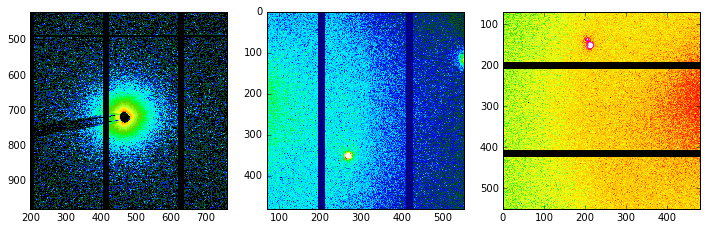

In [80]:
sn = get_fn_from_mesh(TB_sample1_gz, 15, 5)
print(sn)
test_plot(TB_sample1_gz, sn, tc)

In [82]:
save_thumb(TB_sample1_gz, "TB/TB_sample1_gz", tc, size=(128,128))

processing frame #799 (19,39)


In [84]:
TB_test_10exp = '3a3aa202-10f2-4fff-b1bd-4021f0fc3ff5'

In [180]:
TB_sample3_vert_2='7996a6e9-979d-4832-b6f1-785a447e636b'
header, data = fetch_scan(uid=TB_sample3_vert_2)

In [181]:
imS = db.get_images(header, ['pil1M_image',],)


Frame([[-2,  1,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  1],
       [ 1,  0,  0, ...,  1,  0,  0],
       ..., 
       [ 1,  0,  0, ...,  1,  0,  0],
       [ 1,  1,  1, ...,  1,  0,  0],
       [-2,  1,  0, ...,  0,  0,  0]], dtype=int32)
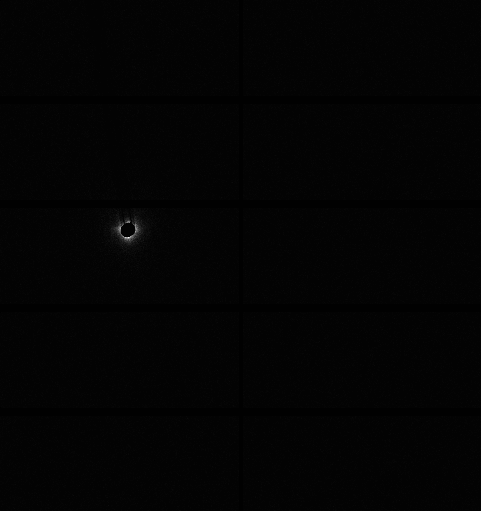

In [182]:
imS[0]

In [32]:
wh_pos([smf.x, ss1.x])


+------------+----------+-----------+------------+
| Positioner |    Value | Low Limit | High Limit |
+------------+----------+-----------+------------+
| smf_x      |  0.16030 |   0.00000 |    0.00000 |
| ss1_x      | 12.30200 | -83.27437 |   41.72344 |
+------------+----------+-----------+------------+


In [33]:
import re

In [75]:
if re.search('s[\w]*_x', header[0].start.plan_pattern_args['args'][-5]):
    print('Y')

Y


In [56]:
header[0].start.plan_pattern_args['args'][-5]

"EpicsMotor(prefix='XF:16IDC-ES:InAir{Stg:ScanF-Ax:X}Mtr', name='smf_x', parent='smf', settle_time=0.0, timeout=None, read_attrs=['user_readback', 'user_setpoint'], configuration_attrs=['motor_egu'])"

In [95]:
file_path = '/GPFS/xf16id/exp_path/301718/300856/'
fn = 'sample3_gz_6_spot_000001'

In [105]:
all_files = print(os.system('ls %s*' % fn))
data_file = [for t in all_files ]

SyntaxError: invalid syntax (<ipython-input-105-6b25d498ae24>, line 2)

In [100]:
os.listdir(fn)

['sample1_gz_000160_SAXS.cbf',
 'sample1_gz_000371_SAXS.cbf',
 'sample2_gz_000073_WAXS1.cbf',
 'sample2_gz_v2_000022_WAXS1_00004.cbf',
 'sample2_gz_000044_WAXS2.cbf',
 'sample1_gz_000478_SAXS.cbf',
 'sample2_gz_v2_000023_WAXS2_00009.cbf',
 'sample1_gz_000377_WAXS2.cbf',
 'sample1_gz_000327_SAXS.cbf',
 'sample1_gz_000072_SAXS.cbf',
 'sample1_gz_000514_WAXS1.cbf',
 'sample1_gz_000749_WAXS1.cbf',
 'sample1_gz_000262_WAXS2.cbf',
 'sample1_gz_000399_WAXS2.cbf',
 'sample1_gz_000112_WAXS1.cbf',
 'sample2_gz_000053_SAXS.cbf',
 'sample2_gz_v2_000014_SAXS_00002.cbf',
 'sample2_gz_000095_WAXS2.cbf',
 'sample2_gz_v2_000014_SAXS_00005.cbf',
 'sample2_gz_v2_000016_SAXS_00004.cbf',
 'sample2_gz_v2_000011_WAXS2_00005.cbf',
 'sample2_gz_000078_WAXS2.cbf',
 'sample3_mz_3_spot_000001_WAXS2.log',
 'sample1_gz_000796_WAXS1.cbf',
 'sample1_gz_000552_WAXS2.cbf',
 'sample2_gz_000010_WAXS2.cbf',
 'sample1_gz_000391_WAXS2.cbf',
 'sample1_gz_000208_WAXS1.cbf',
 'sample1_gz_000561_WAXS2.cbf',
 'sample1_gz_000506_

In [140]:
TB_sample3_gz_h1 = '21544043-6076-4f47-9abd-4d2b49c1aecf'

In [143]:
save_thumb(TB_sample3_gz_h1, "TB/TB_sample3_gz_h1", tc, fast_axis='y', size=(128,128))

processing frame #30 (0,30)


In [145]:
TB_sample3_gz_h2 = 'f1b85f4a-25cb-4d9b-9ea7-2458dc47dc12'
save_thumb(TB_sample3_gz_h2, "TB/TB_sample3_gz_h2", tc, fast_axis='y', size=(128,128))

processing frame #30 (0,30)


In [146]:
TB_sample3_hor_15='1345b39d-08a8-4470-9a6e-55a11313cd79'
save_thumb(TB_sample3_hor_15, "TB/TB_sample3_hor_15", tc, fast_axis='y', size=(128,128))

processing frame #30 (0,30)


In [147]:
TB_sample3_vert_2='7996a6e9-979d-4832-b6f1-785a447e636b'
save_thumb(TB_sample3_vert_2, "TB/TB_sample3_vert_2", tc, fast_axis='x', size=(128,128))

processing frame #30 (0,30)


In [127]:
lee_7ix_v1='65fda8e1-8f7a-4fbe-99ce-20bdfc3f518a'
save_thumb(lee_7ix_v1, "TB/lee_7ix_v1", tc, fast_axis='x', size=(128,128))

sample1_000001_SAXS.cbf      sample1_gz_000723_WAXS1.cbf
sample1_000001_WAXS1.cbf     sample1_gz_000723_WAXS2.cbf
sample1_000001_WAXS2.cbf     sample1_gz_000724_SAXS.cbf
sample1_000002_SAXS.cbf      sample1_gz_000724_WAXS1.cbf
sample1_000002_WAXS1.cbf     sample1_gz_000724_WAXS2.cbf
sample1_000002_WAXS2.cbf     sample1_gz_000725_SAXS.cbf
sample1_000003_SAXS.cbf      sample1_gz_000725_WAXS1.cbf
sample1_000003_WAXS1.cbf     sample1_gz_000725_WAXS2.cbf
sample1_000003_WAXS2.cbf     sample1_gz_000726_SAXS.cbf
sample1_000004_SAXS.cbf      sample1_gz_000726_WAXS1.cbf
sample1_000004_WAXS1.cbf     sample1_gz_000726_WAXS2.cbf
sample1_000004_WAXS2.cbf     sample1_gz_000727_SAXS.cbf
sample1_000005_SAXS.cbf      sample1_gz_000727_WAXS1.cbf
sample1_000005_WAXS1.cbf     sample1_gz_000727_WAXS2.cbf
sample1_000005_WAXS2.cbf     sample1_gz_000728_SAXS.cbf
sample1_000006_SAXS.cbf      sample1_gz_000728_WAXS1.cbf
sample1_000006_WAXS1.cbf     sample1_gz_000728_WAXS2.cbf
sample1_000006_WAXS2.cbf     sample1

In [154]:
dry_h1_mz_scan1='ee015ddb-bbbc-4b56-b27d-48ca9ba44938'
save_thumb(dry_h1_mz_scan1, "TB/dry_h1_mz_scan1", tc, fast_axis='x', size=(128,128))

processing frame #20 (0,20)


In [155]:
dry_root_gz_vert_v1='0d93bfc3-af3d-4343-82de-7484837fc625'
save_thumb(dry_root_gz_vert_v1, "TB/TB_dry_root_gz_vert_v1", tc, fast_axis='', size=(128,128))

processing frame #18 (0,18)


In [199]:
dry_h1='9841680b-9588-4a6f-9d33-1c3452c32c52' # dry_root_h1_scan2_000018_SAXS.cbf
dry_h1_scan5='01fbea1a-3f96-4cb6-b1f8-0d306f8869c0' # dry_root_h1_scan5_000049_SAXS.cbf
dry_h1_scan6='7614a824-7b1a-48dc-bbc8-379a3f59f4e1' # dry_root_h1_scan6_000068_SAXS.cbf
dry_h1_fgz_scan1=' 9ee5c1ab-8c41-44be-b29e-22255238033a' 
dry_h1_mz_scan1='23ac8612-881c-4be2-9d99-af90a0146c32'
dry_h1_mz_scan1='ee015ddb-bbbc-4b56-b27d-48ca9ba44938' # dry_root_mz_v3_000012_SAXS.cbf
dry_root_gz_vert_v1='0d93bfc3-af3d-4343-82de-7484837fc625' # dry_root_gz_vert_v1_000006_SAXS.cbf
dry_root_gz_vert_v2='86793b03-7eba-4f06-9966-792b149c84c1' 
wet_root_gz_hor1_v1='20ad664b-3c7a-44e5-9469-a5a394f2d4c8'
wet_root_gz_hor1_v2='20ad664b-3c7a-44e5-9469-a5a394f2d4c8'
wet_root_gz_vert_v1='ec83c332-9a8c-422e-9b63-52d37bbf5eed'
wet_root_gz_vert_v2='4ae56077-8c6b-4fed-990c-9b9ace1f9bc5'

frame # 10
/GPFS/xf16id/exp_path/301718/300856/dry_root_h1_scan2_000018_SAXS.cbf
/GPFS/xf16id/exp_path/301718/300856/dry_root_h1_scan2_000013_WAXS1.cbf
/GPFS/xf16id/exp_path/301718/300856/dry_root_h1_scan2_000013_WAXS2.cbf


<IPython.core.display.Javascript object>


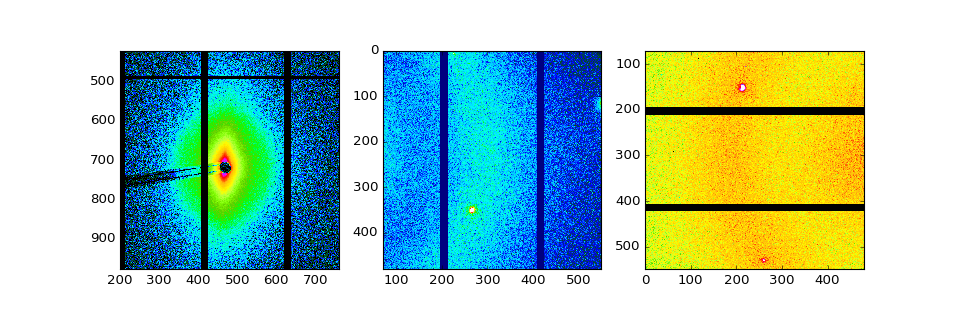

In [318]:
for i in range(10,11):
    print("frame # %d" % i)
    test_plot(dry_h1, i, tc)
#save_thumb(dry_h1, "TB/TB_dry_h1", tc, size=(128,128))

In [195]:
#header = db(uid=dry_h1)
M007_SSB_r1 = '3900087a-e330-4605-bda2-81fe080903f7'
header, data = fetch_scan(uid=M007_SSB_r1)
imS = db.get_images(header, 'pil1M_image')

In [196]:
data.pil1M_image[1]

array([], dtype=float64)

In [156]:
dry_h1_mz_scan1='ee015ddb-bbbc-4b56-b27d-48ca9ba44938'
save_thumb(dry_h1_mz_scan1, "TB/TB_dry_h1_mz_scan1", tc, fast_axis='', size=(128,128))

processing frame #20 (0,20)


In [161]:
wet_root_gz_hor1_v1='20ad664b-3c7a-44e5-9469-a5a394f2d4c8'
save_thumb(wet_root_gz_hor1_v1, "TB/TB_wet_root_gz_hor1_v1", tc, fast_axis='', size=(128,128))

processing frame #22 (0,22)


In [162]:
wet_root_gz_vert_v1='ec83c332-9a8c-422e-9b63-52d37bbf5eed'
save_thumb(wet_root_gz_vert_v1, "TB/TB_wet_root_gz_vert_v1", tc, fast_axis='', size=(128,128))

processing frame #22 (0,22)


In [321]:
TB_sample3_gz_h1 = '21544043-6076-4f47-9abd-4d2b49c1aecf'
header, data = fetch_scan(uid=TB_sample3_gz_h1)
#imS = db.get_images(header, 'pil1M_image')

In [323]:
header[0]

{'descriptors': [{'configuration': {'em1': {'data': {'em1_averaging_time': 0.5,
      'em1_integration_time': 0.005},
     'data_keys': {'em1_averaging_time': {'dtype': 'number',
       'lower_ctrl_limit': 0.0,
       'precision': 2,
       'shape': [],
       'source': 'PV:XF:16IDC-ES{NSLS_EM:1}AveragingTime_RBV',
       'units': '',
       'upper_ctrl_limit': 0.0},
      'em1_integration_time': {'dtype': 'number',
       'lower_ctrl_limit': 0.0004,
       'precision': 4,
       'shape': [],
       'source': 'PV:XF:16IDC-ES{NSLS_EM:1}IntegrationTime_RBV',
       'units': '',
       'upper_ctrl_limit': 1.0}},
     'timestamps': {'em1_averaging_time': 1485444287.841141,
      'em1_integration_time': 1485444287.8411}},
    'em2': {'data': {'em2_averaging_time': 0.2, 'em2_integration_time': 0.01},
     'data_keys': {'em2_averaging_time': {'dtype': 'number',
       'lower_ctrl_limit': 0.0,
       'precision': 2,
       'shape': [],
       'source': 'PV:XF:16IDC-ES{NSLS_EM:2}AveragingTime_RBV',
       'units': '',
       'upper_ctrl_limit': 0.0},
      'em2_integration_time': {'dtype': 'number',
       'lower_ctrl_limit': 0.0004,
       'precision': 4,
       'shape': [],
       'source': 'PV:XF:16IDC-ES{NSLS_EM:2}IntegrationTime_RBV',
       'units': '',
       'upper_ctrl_limit': 1.0}},
     'timestamps': {'em2_averaging_time': 1485447164.349514,
      'em2_integration_time': 1485447164.349483}},
    'pil1M': {'data': {}, 'data_keys': {}, 'timestamps': {}},
    'pilW1': {'data': {}, 'data_keys': {}, 'timestamps': {}},
    'pilW2': {'data': {}, 'data_keys': {}, 'timestamps': {}},
    'smf_x': {'data': {'smf_x_motor_egu': 'um'},
     'data_keys': {'smf_x_motor_egu': {'dtype': 'string',
       'lower_ctrl_limit': None,
       'shape': [],
       'source': 'PV:XF:16IDC-ES:InAir{Stg:ScanF-Ax:X}Mtr.EGU',
       'units': None,
       'upper_ctrl_limit': None}},
     'timestamps': {'smf_x_motor_egu': 1485465302.524232}}},
   'data_keys': {'em1_current1_mean_value': {'dtype': 'number',
     'lower_ctrl_limit': 0.0,
     'object_name': 'em1',
     'precision': 0,
     'shape': [],
     'source': 'PV:XF:16IDC-ES{NSLS_EM:1}Current1:MeanValue_RBV',
     'units': '',
     'upper_ctrl_limit': 0.0},
    'em1_current2_mean_value': {'dtype': 'number',
     'lower_ctrl_limit': 0.0,
     'object_name': 'em1',
     'precision': 0,
     'shape': [],
     'source': 'PV:XF:16IDC-ES{NSLS_EM:1}Current2:MeanValue_RBV',
     'units': '',
     'upper_ctrl_limit': 0.0},
    'em1_current3_mean_value': {'dtype': 'number',
     'lower_ctrl_limit': 0.0,
     'object_name': 'em1',
     'precision': 0,
     'shape': [],
     'source': 'PV:XF:16IDC-ES{NSLS_EM:1}Current3:MeanValue_RBV',
     'units': '',
     'upper_ctrl_limit': 0.0},
    'em1_current4_mean_value': {'dtype': 'number',
     'lower_ctrl_limit': 0.0,
     'object_name': 'em1',
     'precision': 0,
     'shape': [],
     'source': 'PV:XF:16IDC-ES{NSLS_EM:1}Current4:MeanValue_RBV',
     'units': '',
     'upper_ctrl_limit': 0.0},
    'em2_current1_mean_value': {'dtype': 'number',
     'lower_ctrl_limit': 0.0,
     'object_name': 'em2',
     'precision': 0,
     'shape': [],
     'source': 'PV:XF:16IDC-ES{NSLS_EM:2}Current1:MeanValue_RBV',
     'units': '',
     'upper_ctrl_limit': 0.0},
    'em2_current2_mean_value': {'dtype': 'number',
     'lower_ctrl_limit': 0.0,
     'object_name': 'em2',
     'precision': 0,
     'shape': [],
     'source': 'PV:XF:16IDC-ES{NSLS_EM:2}Current2:MeanValue_RBV',
     'units': '',
     'upper_ctrl_limit': 0.0},
    'em2_current3_mean_value': {'dtype': 'number',
     'lower_ctrl_limit': 0.0,
     'object_name': 'em2',
     'precision': 0,
     'shape': [],
     'source': 'PV:XF:16IDC-ES{NSLS_EM:2}Current3:MeanValue_RBV',
     'units': '',
     'upper_ctrl_limit': 0.0},
    'em2_current4_mean_value': {'dtype': 'number',
     'lower_ctrl_limit': 0.0,
     'object_name': 'em2',
     'precision': 0,
     'shape': [],
     'source': 'PV:XF:16IDC-ES{NSLS_EM:2}Current4:MeanValue_R

In [157]:
Lee_DN_2_jan29 = 'ea90dfe4-1ff6-4ce3-a70f-851a8ac9fed7'
save_thumb(Lee_DN_2_jan29, "lee/Lee_DN_2_jan29", tc, fast_axis='', size=(128,128))

fast axis is x
scan shape:  [20, 40]


/GPFS/xf16id/controls/git/pyXS/pyxs/Data2D.py:50: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if im==None:


ValueError: need more than 1 value to unpack

In [331]:
Lee_7DN_jan29 = '548039ec-7337-41df-a757-13500eb6014d'
save_thumb2(Lee_7DN_jan29, "lee/Lee_7DN_jan29 ", tc, fast_axis='', size=(128,128))

fast axis is x
scan shape:  [20, 40]


KeyError: 0

In [160]:
Lee_8ix_jan29 = '865ab090-9cb6-435e-a242-152037ab31d8'
save_thumb(Lee_8ix_jan29, "lee/Lee_8ix_jan29", tc, fast_axis='', size=(128,128))

fast axis is x
scan shape:  [20, 40]


/GPFS/xf16id/controls/git/pyXS/pyxs/Data2D.py:50: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if im==None:


ValueError: need more than 1 value to unpack

In [ ]:
Lee_7JE5_jan29 = '6d98c9db-18b2-4d58-b0bf-a02de6b4c8a0'
save_thumb(Lee_7JE5_jan29, "lee/Lee_7JE5_jan29", tc, fast_axis='', size=(128,128))

In [159]:
#sn = get_fn_from_mesh(TB_dry_h1_scan6, 1, 1)
#print(sn)
test_plot(Lee_DN_2_jan29, 1, tc)

ERROR:openimage:[Errno 2] No such file or directory: '/GPFS/xf16id/exp_path/leejan17/leejan17/TEST4DN_2_jan29_000001_SAXS.cbf': File probably does not exist


/GPFS/xf16id/exp_path/leejan17/leejan17/TEST4DN_2_jan29_000001


FileNotFoundError: [Errno 2] No such file or directory: '/GPFS/xf16id/exp_path/leejan17/leejan17/TEST4DN_2_jan29_000001_SAXS.cbf'

## CJ scans

In [332]:
cj_wt_jan31_0_degree_v1 = "85a19013-050c-4308-beb4-91a57c7112d5"
save_thumb(cj_wt_jan31_0_degree_v1, "CJ/cj_wt_jan31_0_degree_v1", tc, fast_axis='', size=(128,128))

processing frame #1599 (39,39)


In [333]:
cj_wt_jan31_ry_5_degree_v1="869fe63b-a30a-4897-907e-82cbfdc8e759"
save_thumb(cj_wt_jan31_ry_5_degree_v1, "CJ/cj_wt_jan31_ry_5_degree_v1", tc, fast_axis='', size=(128,128))

processing frame #1599 (39,39)


In [334]:
cj_wt_jan31_ry_10_degree_v1 = "b1a88657-5613-4519-96a7-09252fe3678e"
save_thumb(cj_wt_jan31_ry_10_degree_v1, "CJ/cj_wt_jan31_ry_10_degree_v1", tc, fast_axis='', size=(128,128))

processing frame #1599 (39,39)


In [339]:
cj_wt_jan31_ry_20_degree_v1 = "d39207cb-dfd2-4e94-bec2-9236cba596d6"
save_thumb(cj_wt_jan31_ry_20_degree_v1, "CJ/cj_wt_jan31_ry_20_degree_v1", tc, fast_axis='', size=(128,128))

processing frame #201 (5,1)


IndexError: list index out of range

In [337]:
cj_wt_jan31_rx_20_degree_v1 = "9adf52a1-2bd8-412b-a033-ac08ad9a2afc"
save_thumb(cj_wt_jan31_rx_20_degree_v1, "CJ/cj_wt_jan31_rx_20_degree_v1", tc, fast_axis='', size=(128,128))

processing frame #1599 (39,39)


In [359]:
cj_wt_jan31_ry_40_degree_v1 = "35b64904-706b-4fdd-ad25-5e727877f307"
save_thumb(cj_wt_jan31_ry_40_degree_v1, "CJ/cj_wt_jan31_rx_40_degree_v1", tc, fast_axis='', size=(128,128))

processing frame #537 (13,17)


ERROR:openimage:[Errno 2] No such file or directory: '/GPFS/xf16id/exp_path/301525/300890/cj_wt_jan31_rx_40_degree_v1_000539_WAXS1.cbf': File probably does not exist


FileNotFoundError: [Errno 2] No such file or directory: '/GPFS/xf16id/exp_path/301525/300890/cj_wt_jan31_rx_40_degree_v1_000539_WAXS1.cbf'

In [344]:
cj_mut_feb1_r_0_degree = "af45124f-ba62-4121-b0d5-79864d91112e"
save_thumb(cj_mut_feb1_r_0_degree, "CJ/cj_mut_feb1_r_0_degree", tc, fast_axis='', size=(128,128))

processing frame #1599 (39,39)


In [341]:
cj_mut_feb1_ry_10_degree = "1a08cf83-dcb2-4659-b961-ef18f5de1bf6"
save_thumb(cj_mut_feb1_ry_10_degree, "CJ/cj_mut_feb1_ry_10_degree", tc, fast_axis='', size=(128,128))

processing frame #1599 (39,39)


In [343]:
cj_mut_feb1_ry_20_degree = "0d0e6c58-1da0-4def-a31d-be96246601f6"
save_thumb(cj_mut_feb1_ry_20_degree, "CJ/cj_mut_feb1_ry_20_degree", tc, fast_axis='', size=(128,128))

processing frame #1599 (39,39)


In [345]:
cj_mut_feb1_rx_20_degree = "c0a838c3-b337-4e60-afac-c8dff0926f2d"
save_thumb(cj_mut_feb1_rx_20_degree, "CJ/cj_mut_feb1_rx_20_degree", tc, fast_axis='', size=(128,128))

processing frame #1599 (39,39)


In [346]:
cj_mut_feb1_rx_40_degree = "5eb2f0d6-e5df-41e6-9052-e4d9a131a436"
save_thumb(cj_mut_feb1_rx_40_degree, "CJ/cj_mut_feb1_rx_40_degree", tc, fast_axis='', size=(128,128))

processing frame #1599 (39,39)


In [348]:
cj_mut_feb1_ry_40_degree = "f742b674-0e34-44cc-b086-97e26a5c9790"
save_thumb(cj_mut_feb1_ry_40_degree, "CJ/cj_mut_feb1_ry_40_degree", tc, fast_axis='', size=(128,128))

processing frame #1599 (39,39)


In [355]:
header, data = fetch_scan(uid=cj_wt_feb2_r_0_degree)

In [357]:
data

,time,pilW2_file_reset_file_number,pilW1_file_file_name,pilW2_file_file_name,pilW2_file_file_path,em2_current4_mean_value,em2_current2_mean_value,em1_current1_mean_value,pil1M_file_file_name,pil1M_file_file_path,...,pil1M_file_reset_file_number,pilW2_file_file_template,ss2_y_user_setpoint,em1_current4_mean_value,ss2_x,pilW2_file_file_number,pilW1_file_file_number,pilW1_image,em1_current2_mean_value,ss2_y
1,2017-02-02 19:02:07.155545-05:00,1,cj_wt_feb2_r_0_deg,cj_wt_feb2_r_0_deg,/GPFS/xf16id/exp_path/301525/300890_v1/,-30.5,2.1,32.28,cj_wt_feb2_r_0_deg,/GPFS/xf16id/exp_path/301525/300890_v1/,...,1,%s%s_%6.6d_WAXS2.cbf,1.450000,12.58,-0.65,2,2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",47.86,1.4500
2,2017-02-02 19:02:09.639492-05:00,1,cj_wt_feb2_r_0_deg,cj_wt_feb2_r_0_deg,/GPFS/xf16id/exp_path/301525/300890_v1/,-40.2,-0.7,59.48,cj_wt_feb2_r_0_deg,/GPFS/xf16id/exp_path/301525/300890_v1/,...,1,%s%s_%6.6d_WAXS2.cbf,1.455128,9.68,-0.65,3,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",54.40,1.4551
3,2017-02-02 19:02:12.120072-05:00,1,cj_wt_feb2_r_0_deg,cj_wt_feb2_r_0_deg,/GPFS/xf16id/exp_path/301525/300890_v1/,-40.4,2.4,50.40,cj_wt_feb2_r_0_deg,/GPFS/xf16id/exp_path/301525/300890_v1/,...,1,%s%s_%6.6d_WAXS2.cbf,1.460256,-1.62,-0.65,4,4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",47.74,1.4603
4,2017-02-02 19:02:15.069867-05:00,1,cj_wt_feb2_r_0_deg,cj_wt_feb2_r_0_deg,/GPFS/xf16id/exp_path/301525/300890_v1/,-28.8,-0.9,80.34,cj_wt_feb2_r_0_deg,/GPFS/xf16id/exp_path/301525/300890_v1/,...,1,%s%s_%6.6d_WAXS2.cbf,1.465385,14.54,-0.65,5,5,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",62.50,1.4654
5,2017-02-02 19:02:17.788822-05:00,1,cj_wt_feb2_r_0_deg,cj_wt_feb2_r_0_deg,/GPFS/xf16id/exp_path/301525/300890_v1/,-33.6,-6.3,53.44,cj_wt_feb2_r_0_deg,/GPFS/xf16id/exp_path/301525/300890_v1/,...,1,%s%s_%6.6d_WAXS2.cbf,1.470513,13.32,-0.65,6,6,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",56.44,1.4705
6,2017-02-02 19:02:20.493683-05:00,1,cj_wt_feb2_r_0_deg,cj_wt_feb2_r_0_deg,/GPFS/xf16id/exp_path/301525/300890_v1/,-25.8,12.0,66.56,cj_wt_feb2_r_0_deg,/GPFS/xf16id/exp_path/301525/300890_v1/,...,1,%s%s_%6.6d_WAXS2.cbf,1.475641,2.74,-0.65,7,7,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",52.96,1.4756
7,2017-02-02 19:02:23.033683-05:00,1,cj_wt_feb2_r_0_deg,cj_wt_feb2_r_0_deg,/GPFS/xf16id/exp_path/301525/300890_v1/,-29.1,-7.4,84.96,cj_wt_feb2_r_0_deg,/GPFS/xf16id/exp_path/301525/300890_v1/,...,1,%s%s_%6.6d_WAXS2.cbf,1.480769,16.86,-0.65,8,8,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",60.86,1.4808
8,2017-02-02 19:02:25.634220-05:00,1,cj_wt_feb2_r_0_deg,cj_wt_feb2_r_0_deg,/GPFS/xf16id/exp_path/301525/300890_v1/,-30.9,1.0,69.60,cj_wt_feb2_r_0_deg,/GPFS/xf16id/exp_path/301525/300890_v1/,...,1,%s%s_%6.6d_WAXS2.cbf,1.485897,11.76,-0.65,9,9,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",53.80,1.4859
9,2017-02-02 19:02:28.428754-05:00,1,cj_wt_feb2_r_0_deg,cj_wt_feb2_r_0_deg,/GPFS/xf16id/exp_path/301525/300890_v1/,-28.2,1.3,50.00,cj_wt_feb2_r_0_deg,/GPFS/xf16id/exp_path/301525/300890_v1/,...,1,%s%s_%6.6d_WAXS2.cbf,1.491026,7.58,-0.65,10,10,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",54.32,1.4910
10,2017-02-02 19:02:30.952180-05:00,1,cj_wt_feb2_r_0_deg,cj_wt_feb2_r_0_deg,/GPFS/xf16id/exp_path/301525/300890_v1/,-38.5,-3.8,72.06,cj_wt_feb2_r_0_deg,/GPFS/xf16id/exp_path/301525/300890_v1/,...,1,%s%s_%6.6d_WAXS2.cbf,1.496154,17.34,-0.65,11,11,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",71.58,1.4961


/GPFS/xf16id/exp_path/301525/300890_v1/cj_wt_feb2_r_0_deg_000011_SAXS.cbf
/GPFS/xf16id/exp_path/301525/300890_v1/cj_wt_feb2_r_0_deg_000011_WAXS1.cbf
/GPFS/xf16id/exp_path/301525/300890_v1/cj_wt_feb2_r_0_deg_000011_WAXS2.cbf


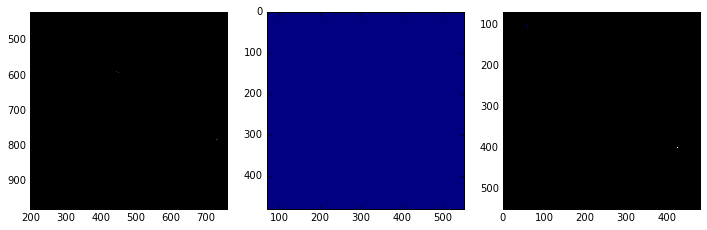

In [354]:
test_plot(cj_wt_feb2_r_0_degree, 10, tc)

In [360]:
cj_wt_feb2_r_0_degree = "7b56a357-e319-4067-88c5-0316b6f128e3"
save_thumb(cj_wt_feb2_r_0_degree, "CJ/cj_wt_feb2_r_0_degree", tc, fast_axis='', size=(128,128))

processing frame #1599 (39,39)


In [376]:
cj_wt_feb2_ry_20_degree = "d98f0735-7346-421f-be29-79d80ac5bca3"
save_thumb(cj_wt_feb2_ry_20_degree, "CJ/cj_wt_feb2_ry_20_degree", tc, fast_axis='', size=(128,128))

processing frame #1599 (39,39)


In [377]:
cj_wt_feb2_ry_40_degree = "2eb9af82-72c4-426a-9e26-cf78f61fccf2"
save_thumb(cj_wt_feb2_ry_40_degree, "CJ/cj_wt_feb2_ry_40_degree", tc, fast_axis='', size=(128,128))

processing frame #1599 (39,39)


In [378]:
cj_wt_feb2_rx_20_degree = "4a628f01-9bd6-4b50-bc4b-2b1a9b887a43"
save_thumb(cj_wt_feb2_rx_20_degree, "CJ/cj_wt_feb2_rx_20_degree", tc, fast_axis='', size=(128,128))

processing frame #1599 (39,39)


In [379]:
cj_wt_feb2_rx_40_degree = "6f383851-653d-4fee-87dd-d4d7a500f221"
save_thumb(cj_wt_feb2_rx_40_degree, "CJ/cj_wt_feb2_rx_40_degree", tc, fast_axis='', size=(128,128))

processing frame #1599 (39,39)


In [380]:
cj_wt_feb3_r_0_degree_spot2 = "0359bd8e-7fdb-49ee-9461-7ae38767f0ef"
save_thumb(cj_wt_feb3_r_0_degree_spot2, "CJ/cj_wt_feb3_r_0_degree_spot2", tc, fast_axis='', size=(128,128))

processing frame #1599 (39,39)


In [381]:
cj_wt_feb3_ry_30_degree_spot2 = "c31a4893-e8fd-47c8-825d-f9c2b7ec5151"
save_thumb(cj_wt_feb3_ry_30_degree_spot2, "CJ/cj_wt_feb3_ry_30_degree_spot2", tc, fast_axis='', size=(128,128))

processing frame #1599 (39,39)


In [382]:
cj_wt_feb3_rx_30_degree_spot2 = "2ee415e1-20d2-4131-9f44-eeeada355a44"
save_thumb(cj_wt_feb3_rx_30_degree_spot2, "CJ/cj_wt_feb3_rx_30_degree_spot2", tc, fast_axis='', size=(128,128))

processing frame #1599 (39,39)


processing frame #156 (3,36)


KeyboardInterrupt: 

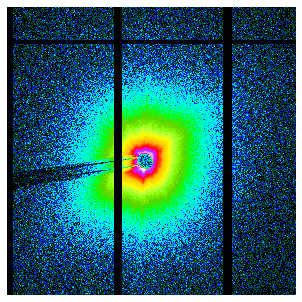

In [385]:
cj_wt_feb3_r_0_degree_spot3 = "de6b448c-dcbb-4f83-8b07-b0877d3fb791"
save_thumb(cj_wt_feb3_r_0_degree_spot3, "CJ/cj_wt_feb3_r_0_degree_spot3", tc, fast_axis='', size=(128,128))

In [386]:
cj_wt_feb3_ry_30_degree_spot3 = "5cf1e49f-3df2-4845-a413-7c97041e29a0"
save_thumb(cj_wt_feb3_ry_30_degree_spot3, "CJ/cj_wt_feb3_ry_30_degree_spot3", tc, fast_axis='', size=(128,128))

ERROR:openimage:[Errno 2] No such file or directory: '/GPFS/xf16id/exp_path/301525/300890_v1/cj_wt_feb3_ry_30_deg_spot3_000001_SAXS.cbf': File probably does not exist


fast axis is y
scan shape:  [40, 40]


FileNotFoundError: [Errno 2] No such file or directory: '/GPFS/xf16id/exp_path/301525/300890_v1/cj_wt_feb3_ry_30_deg_spot3_000001_SAXS.cbf'

In [402]:
cj_mu_feb06_s1_r0 = '9391f96f-81df-4619-8065-499f270dd747'
save_thumb(cj_mu_feb06_s1_r0, "CJ/cj_mu_feb06_s1_r0", tc, fast_axis='', size=(128,128))

processing frame #1599 (39,39)


In [403]:
cj_mu_feb06_s1_rx30 = 'a99650ab-b763-46e9-abff-3386167eb703'
save_thumb(cj_mu_feb06_s1_rx30, "CJ/cj_mu_feb06_s1_rx30", tc, fast_axis='', size=(128,128))

processing frame #1599 (39,39)


In [405]:
cj_mu_feb06_s1_ry30 = '812e9965-eecb-4ab2-b945-08ef9e050cf8'
save_thumb(cj_mu_feb06_s1_ry30, "CJ/cj_mu_feb06_s1_ry30", tc, fast_axis='', size=(128,128))

processing frame #1599 (39,39)


In [406]:
cj_mu_feb07_s4_rx30 = '779f6083-6b69-4d26-9823-8fa19331b8f2'
save_thumb(cj_mu_feb07_s4_rx30, "CJ/cj_mu_feb07_s4_rx30", tc, fast_axis='', size=(128,128))

processing frame #1599 (39,39)


In [408]:
db[-4]

{'descriptors': [{'configuration': {'em1': {'data': {'em1_averaging_time': 0.5,
      'em1_integration_time': 0.005},
     'data_keys': {'em1_averaging_time': {'dtype': 'number',
       'lower_ctrl_limit': 0.0,
       'precision': 2,
       'shape': [],
       'source': 'PV:XF:16IDC-ES{NSLS_EM:1}AveragingTime_RBV',
       'units': '',
       'upper_ctrl_limit': 0.0},
      'em1_integration_time': {'dtype': 'number',
       'lower_ctrl_limit': 0.0004,
       'precision': 4,
       'shape': [],
       'source': 'PV:XF:16IDC-ES{NSLS_EM:1}IntegrationTime_RBV',
       'units': '',
       'upper_ctrl_limit': 1.0}},
     'timestamps': {'em1_averaging_time': 1485444287.841141,
      'em1_integration_time': 1485444287.8411}},
    'em2': {'data': {'em2_averaging_time': 0.2, 'em2_integration_time': 0.01},
     'data_keys': {'em2_averaging_time': {'dtype': 'number',
       'lower_ctrl_limit': 0.0,
       'precision': 2,
       'shape': [],
       'source': 'PV:XF:16IDC-ES{NSLS_EM:2}AveragingTime_RBV',
       'units': '',
       'upper_ctrl_limit': 0.0},
      'em2_integration_time': {'dtype': 'number',
       'lower_ctrl_limit': 0.0004,
       'precision': 4,
       'shape': [],
       'source': 'PV:XF:16IDC-ES{NSLS_EM:2}IntegrationTime_RBV',
       'units': '',
       'upper_ctrl_limit': 1.0}},
     'timestamps': {'em2_averaging_time': 1485447164.349514,
      'em2_integration_time': 1485447164.349483}},
    'pil1M': {'data': {}, 'data_keys': {}, 'timestamps': {}},
    'pilW1': {'data': {}, 'data_keys': {}, 'timestamps': {}},
    'pilW2': {'data': {}, 'data_keys': {}, 'timestamps': {}},
    'ss2_x': {'data': {'ss2_x_motor_egu': 'mm'},
     'data_keys': {'ss2_x_motor_egu': {'dtype': 'string',
       'lower_ctrl_limit': None,
       'shape': [],
       'source': 'PV:XF:16IDC-ES:Scan2{Ax:X}Mtr.EGU',
       'units': None,
       'upper_ctrl_limit': None}},
     'timestamps': {'ss2_x_motor_egu': 1486486319.799517}},
    'ss2_y': {'data': {'ss2_y_motor_egu': 'mm'},
     'data_keys': {'ss2_y_motor_egu': {'dtype': 'string',
       'lower_ctrl_limit': None,
       'shape': [],
       'source': 'PV:XF:16IDC-ES:Scan2{Ax:Y}Mtr.EGU',
       'units': None,
       'upper_ctrl_limit': None}},
     'timestamps': {'ss2_y_motor_egu': 1486486321.487395}}},
   'data_keys': {'em1_current1_mean_value': {'dtype': 'number',
     'lower_ctrl_limit': 0.0,
     'object_name': 'em1',
     'precision': 0,
     'shape': [],
     'source': 'PV:XF:16IDC-ES{NSLS_EM:1}Current1:MeanValue_RBV',
     'units': '',
     'upper_ctrl_limit': 0.0},
    'em1_current2_mean_value': {'dtype': 'number',
     'lower_ctrl_limit': 0.0,
     'object_name': 'em1',
     'precision': 0,
     'shape': [],
     'source': 'PV:XF:16IDC-ES{NSLS_EM:1}Current2:MeanValue_RBV',
     'units': '',
     'upper_ctrl_limit': 0.0},
    'em1_current3_mean_value': {'dtype': 'number',
     'lower_ctrl_limit': 0.0,
     'object_name': 'em1',
     'precision': 0,
     'shape': [],
     'source': 'PV:XF:16IDC-ES{NSLS_EM:1}Current3:MeanValue_RBV',
     'units': '',
     'upper_ctrl_limit': 0.0},
    'em1_current4_mean_value': {'dtype': 'number',
     'lower_ctrl_limit': 0.0,
     'object_name': 'em1',
     'precision': 0,
     'shape': [],
     'source': 'PV:XF:16IDC-ES{NSLS_EM:1}Current4:MeanValue_RBV',
     'units': '',
     'upper_ctrl_limit': 0.0},
    'em2_current1_mean_value': {'dtype': 'number',
     'lower_ctrl_limit': 0.0,
     'object_name': 'em2',
     'precision': 0,
     'shape': [],
     'source': 'PV:XF:16IDC-ES{NSLS_EM:2}Current1:MeanValue_RBV',
     'units': '',
     'upper_ctrl_limit': 0.0},
    'em2_current2_mean_value': {'dtype': 'number',
     'lower_ctrl_limit': 0.0,
     'object_name': 'em2',
     'precision': 0,
     'shape': [],
     'source': 'PV:XF:16IDC-ES{NSLS_EM:2}Current2:MeanValue_RBV',
     'units': '',
     'upper_ctrl_limit': 0.0},
    'em2_current3_mean_value': {'dtype': 'number',
     'lower_ctrl_limit': 0.0,
     'object_name': 'em2',
     'precision': 0,
     'shape': [],
  

In [410]:
cj_mu_feb07_s4_ry30 = '5b7f193f-c1d0-4aa1-bed3-0776215a3d45'
save_thumb(cj_mu_feb07_s4_ry30, "CJ/cj_mu_feb07_s4_ry30", tc, fast_axis='', size=(128,128))

processing frame #1599 (39,39)


In [411]:
cj_mu_feb07_s5_r0 = 'c2b946bc-4268-4b12-b7b9-6d17a50be788'
save_thumb(cj_mu_feb07_s5_r0, "CJ/cj_mu_feb07_s5_r0", tc, fast_axis='', size=(128,128))

processing frame #1599 (39,39)


In [412]:
cj_mu_feb07_s6_rx30 =  'bb2d1c5a-3180-4760-9b17-39d4b6fb5c0d'
save_thumb(cj_mu_feb07_s6_rx30, "CJ/cj_mu_feb07_s6_rx30", tc, fast_axis='', size=(128,128))

processing frame #1599 (39,39)


In [413]:
cj_mu_feb07_s6_ry30 =  '6dc6e6ac-eb28-4abd-8e1b-e90d22631149'
save_thumb(cj_mu_feb07_s6_ry30, "CJ/cj_mu_feb07_s6_ry30", tc, fast_axis='', size=(128,128))

processing frame #1599 (39,39)


In [417]:
cj_mu_feb07_s7_r0 = '233a3abd-4b1c-460f-9a1f-3d2165aaf715'
save_thumb(cj_mu_feb07_s7_r0, "CJ/cj_mu_feb07_s7_r0", tc, fast_axis='', size=(128,128))

processing frame #540 (13,20)


ERROR:openimage:[Errno 2] No such file or directory: '/GPFS/xf16id/exp_path/301525/300890/cj_mu_feb7_r_0_deg_s7_000542_SAXS.cbf': File probably does not exist


FileNotFoundError: [Errno 2] No such file or directory: '/GPFS/xf16id/exp_path/301525/300890/cj_mu_feb7_r_0_deg_s7_000542_SAXS.cbf'

In [415]:
cj_mu_feb07_s7_rx30 =  'e2eb09c3-dd6f-49dc-a345-4c1f74bac4db'
save_thumb(cj_mu_feb07_s7_rx30, "CJ/cj_mu_feb07_s7_rx30", tc, fast_axis='', size=(128,128))

processing frame #1599 (39,39)


In [416]:
cj_mu_feb07_s7_ry30 =  '7143663a-4c31-41a5-864e-ea47c6b79934'
save_thumb(cj_mu_feb07_s7_ry30, "CJ/cj_mu_feb07_s7_ry30", tc, fast_axis='', size=(128,128))

processing frame #1599 (39,39)


In [418]:
cj_mu_feb08_s8_r0 =  '2ef5e69b-54e2-4273-9edd-e00d6ec63912'
save_thumb(cj_mu_feb08_s8_r0, "CJ/cj_mu_feb08_s8_r0", tc, fast_axis='', size=(128,128))

processing frame #1599 (39,39)


In [419]:
cj_mu_feb08_s8_rx30 =  '53a01639-86f9-4899-b61d-d582eac2310e'
save_thumb(cj_mu_feb08_s8_rx30, "CJ/cj_mu_feb08_s8_rx30", tc, fast_axis='', size=(128,128))

processing frame #1599 (39,39)


In [420]:
cj_mu_feb08_s8_ry30 =  '7ef8a3af-4ca0-47bc-8f3f-8a22bd9aa974'
save_thumb(cj_mu_feb08_s8_ry30, "CJ/cj_mu_feb08_s8_ry30", tc, fast_axis='', size=(128,128))

processing frame #1599 (39,39)


In [421]:
cj_mu_feb07_s6_ry30_2ndtry='1fad4885-a664-4954-b4da-e4868393f31e'
save_thumb(cj_mu_feb07_s6_ry30_2ndtry, "cj_mu_feb07_s6_ry30_2ndtry", tc, fast_axis='', size=(128,128))

processing frame #1401 (35,1)


ERROR:openimage:[Errno 2] No such file or directory: '/GPFS/xf16id/exp_path/301525/300890/cj_mu_feb8_ry_30_deg_s6_2nd_try_001403_SAXS.cbf': File probably does not exist


FileNotFoundError: [Errno 2] No such file or directory: '/GPFS/xf16id/exp_path/301525/300890/cj_mu_feb8_ry_30_deg_s6_2nd_try_001403_SAXS.cbf'

In [425]:
cj_mu_feb07_s6_ry30_2ndtry='1fad4885-a664-4954-b4da-e4868393f31e'
save_thumb(cj_mu_feb07_s6_ry30_2ndtry, "CJ/cj_mu_feb07_s6_ry30_2ndtry", tc, fast_axis='', size=(128,128))

processing frame #1599 (39,39)
